In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df= pd.read_csv(r"C:\Users\jaken\Documents\student_predictor\dataset\Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
hours_mean = df["Hours Studied"].mean()
hours_sd = df["Hours Studied"].std()

hours_max =df["Hours Studied"].max()
hours_min = df["Hours Studied"].min()

scores_mean = df["Previous Scores"].mean()
scores_sd = df["Previous Scores"].std()

# print(hours_mean)
# print(hours_max)
# print(hours_min)
# print(hours_sd)

rescaled_hours = (df["Hours Studied"] - hours_mean)/hours_sd
rescaled_scores =(df["Previous Scores"] - scores_means)/scores_sd

4.9929
9
1
2.589308796185612


40

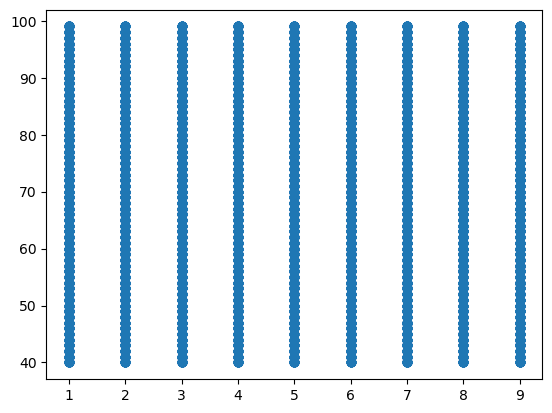

In [31]:
plt.scatter(df["Hours Studied"],df["Previous Scores"])
plt.show()

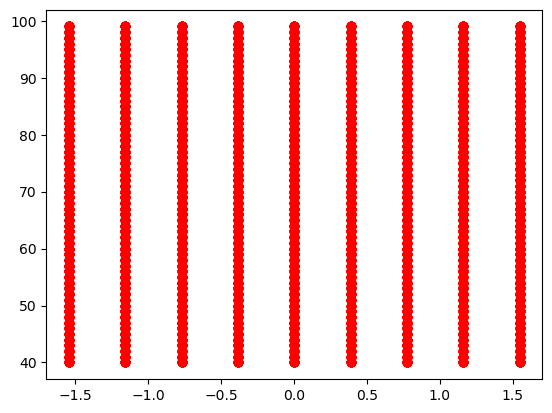

In [32]:
plt.scatter(rescaled_hours,df["Previous Scores"],c="r")
